In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [288]:
df = pd.read_csv('assignment2_data.csv',header=None)

In [289]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

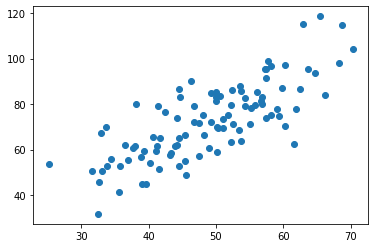

In [290]:
plt.scatter(X,y)

In [291]:
m = len(y)

In [292]:
X = np.hstack([np.ones([m,1]),X.reshape(m,1)])

In [293]:
def cost_func(X,y,theta):
    J = 0
    X = X.reshape((m,2))
    y = y.reshape((m,1))
    theta = theta.reshape((2,1))
    h = np.dot(X,theta)
    J = float(1/(2*m))*np.dot((h-y).T,(h-y))
    return J

In [304]:
cost = (cost_func(X,y,np.ones((2,1))))

In [295]:
def grad_desc(X,y,theta,alpha,num_iter):
    cost = []
    X = X.reshape((m,2))
    y = y.reshape((m,1))
    theta = theta.reshape((2,1))
    for i in range(0,num_iter):
        theta = theta - alpha*(1/m)*np.dot(X.T,(np.dot(X,theta)-y))
        cost.extend(cost_func(X,y,theta)[0])
    return theta,cost

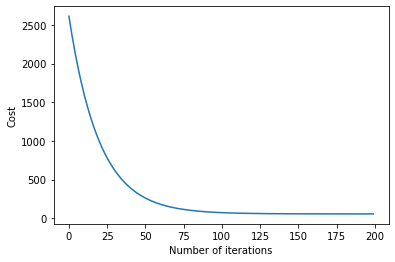

In [303]:
theta,cost = grad_desc(X,y,np.ones((2,1))*0.01,0.00001,200)
plt.plot(list(range(200)),cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

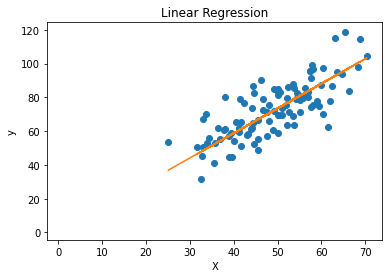

In [299]:
import matplotlib.pyplot as plt
y_hat = theta[0][0]+theta[1][0]*X
ax = plt.axes()
ax.scatter(X[:,1],y)
ax.plot(X, y_hat)
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

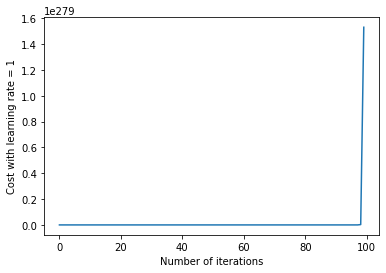

In [300]:
theta,cost = grad_desc(X,y,np.zeros((2,1)),0.01,100)
plt.plot(list(range(100)),cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost with high learning rate')
plt.show()

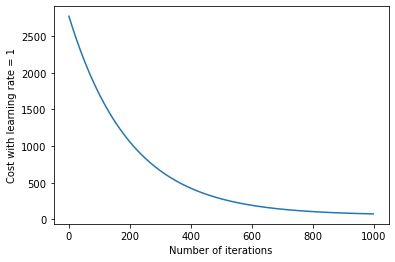

In [301]:
theta,cost = grad_desc(X,y,np.zeros((2,1)),0.000001,1000)
plt.plot(list(range(1000)),cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost with low learning rate')
plt.show()

Cost Funtion: It is the average of the difference between the results of the hypothesis(h), that is the predicted value(y_hat) and the actual outputs(y).

Derivatives: The derivative of the function gives us its slope of the tangent. For the cost optimization, the goal is the minimize the difference between the predicted and actual values and hence move in the direction of decreasing cost, this is done by calculating the derivative of the cost function and updating theta to obtain the optimal cost.

Learning rate: The learning rate determines the step size of the gradient descent. A very small learning rate results in slower convergence. If the learning rate is very high, the gradient descent might overshoot the minima and not converge.